# Results ERA5 

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
from cartopy import crs
from cartopy import feature as cfeature
import fiona
import shapely.geometry
from pyproj import Geod
from rich import print
import pandas as pd
import xarray as xr

import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

### 1990-2000

In [2]:
approx_9000 = pd.read_csv('approx1990_2000.csv', index_col='time')
discharge_9000 = pd.read_csv('discharge1990_2000.csv', index_col='time')
recharge_9000 = pd.read_csv('recharge1990_2000.csv', index_col='time')

In [3]:
discharge_9000['Discharge'] = discharge_9000.mean(axis=1) * 86400 * 1000 / (388.541*10**6)
recharge_9000['Groundwater Recharge'] = recharge_9000.mean(axis=1)*1000

In [4]:
approx_9000['Approximation Groundwater Recharge'] = approx_9000.mean(axis=1)*1000 + discharge_9000['Discharge'].min()
#approx_9000['Approximation Groundwater Recharge'].plot(title='Approximation Groundwater Recharge ERA5 (1990-2000)', ylabel = 'Recharge [mm/day]', color="darkblue")

### 2000-2010

In [5]:
approx_0010 = pd.read_csv('approx2000_2010.csv', index_col='time')
discharge_0010 = pd.read_csv('discharge2000_2010.csv', index_col='time')
recharge_0010 = pd.read_csv('recharge2000_2010.csv', index_col='time')

In [6]:
discharge_0010['Discharge'] = discharge_0010.mean(axis=1) * 86400 * 1000 / (388.541*10**6)
recharge_0010['Groundwater Recharge'] = recharge_0010.mean(axis=1)*1000

In [7]:
approx_0010['Approximation Groundwater Recharge'] = approx_0010.mean(axis=1)*1000 + discharge_0010['Discharge'].min()
#approx_0010['Approximation Groundwater Recharge'].plot(title='Approximation Groundwater Recharge ERA5 (2010-2020)', ylabel = 'Recharge [mm/day]', color="darkblue")

### 2010-2020

In [8]:
approx_1020 = pd.read_csv('approx2010_2020.csv', index_col='time')
discharge_1020 = pd.read_csv('discharge2010_2020.csv', index_col='time')
recharge_1020 = pd.read_csv('recharge2010_2020.csv', index_col='time')

In [9]:
discharge_1020['Discharge'] = discharge_1020.mean(axis=1) * 86400 * 1000 / (388.541*10**6)
recharge_1020['Groundwater Recharge'] = recharge_1020.mean(axis=1)*1000

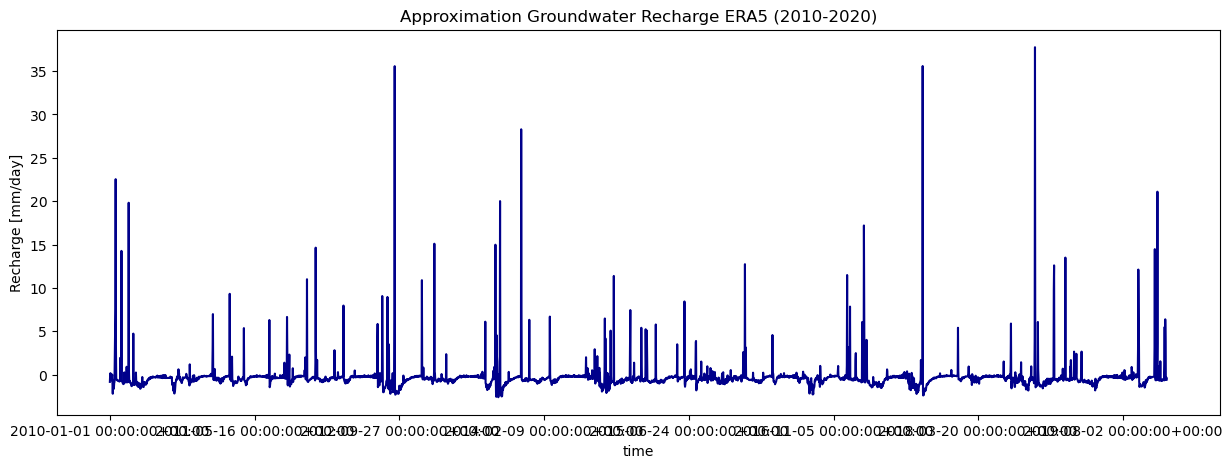

In [10]:
plt.figure(figsize=(15,5))
approx_1020['Approximation Groundwater Recharge'] = approx_1020.mean(axis=1)*1000 + discharge_1020['Discharge'].min()
approx_1020['Approximation Groundwater Recharge'].plot(title='Approximation Groundwater Recharge ERA5 (2010-2020)', ylabel = 'Recharge [mm/day]', color="darkblue");

### Total
Graph of approximated groundwater recharge for 1990-2020.

In [11]:
approx_9020 = pd.concat([approx_9000['Approximation Groundwater Recharge'],
                        approx_0010['Approximation Groundwater Recharge'],
                        approx_1020['Approximation Groundwater Recharge']], ignore_index=True)

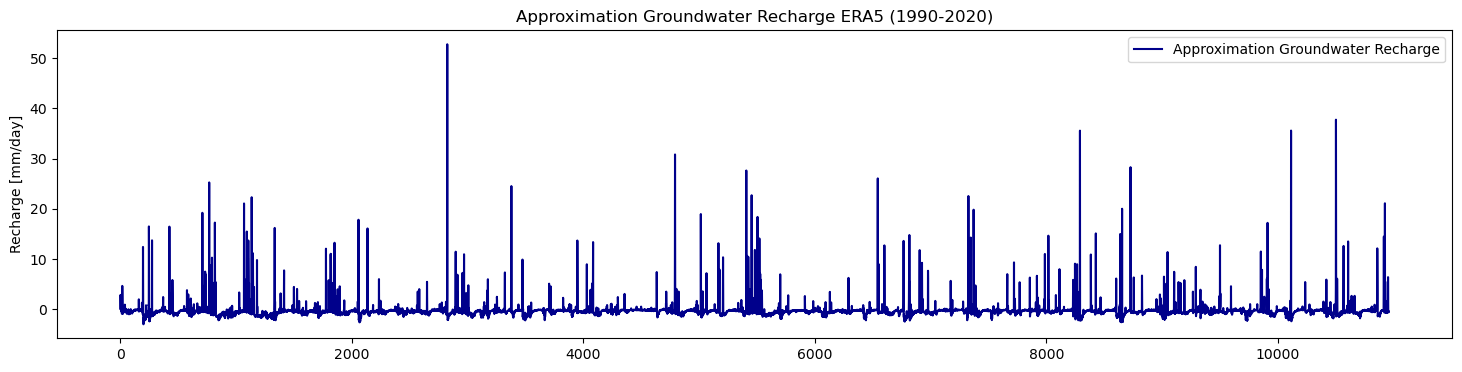

In [12]:
plt.figure(figsize=(18,4))
approx_9020.plot(color='darkblue')
plt.title('Approximation Groundwater Recharge ERA5 (1990-2020)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

In [21]:
#Baseline
total = approx_9020.sum()/30
print(total)

-123.0466164656514

Graph for groundwater recharge directly derived from the PCR-GlobWB model for 1990-2020.

In [15]:
recharge_9020 = pd.concat([recharge_9000['Groundwater Recharge'],
                            recharge_0010['Groundwater Recharge'],
                            recharge_1020['Groundwater Recharge']], ignore_index=True)

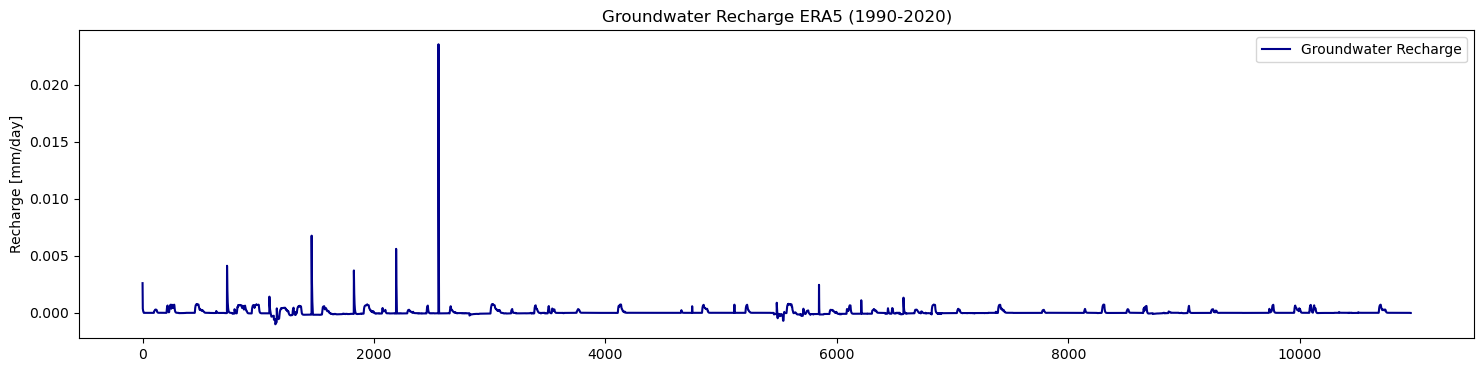

In [16]:
plt.figure(figsize=(18,4))
recharge_9020.plot(color='darkblue')#, xticks=['1990', '2000', '2005', '2010', '2015', '2019'])
plt.title('Groundwater Recharge ERA5 (1990-2020)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

Graph with both the approximated groundwater recharge and groundwater recharge for 1990-2020.

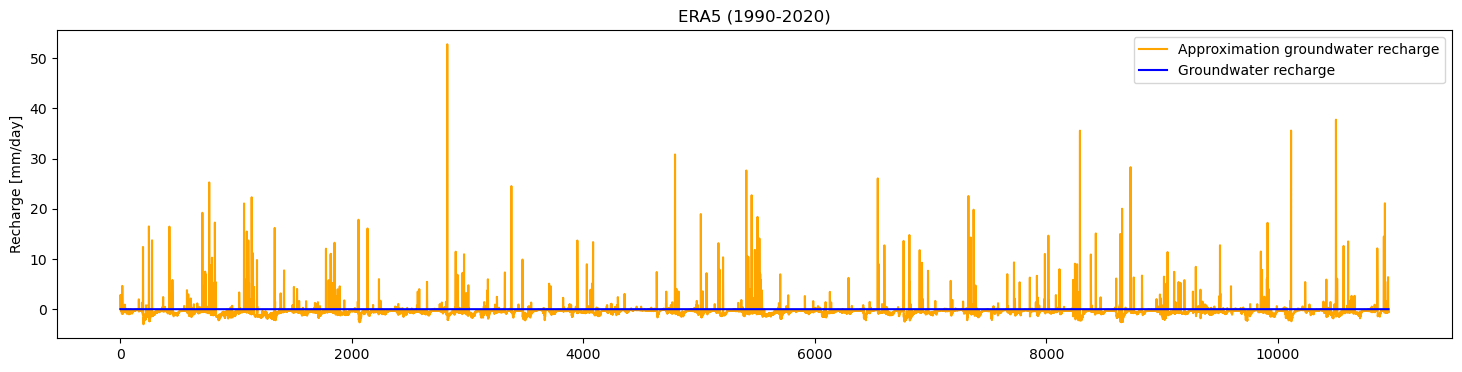

In [17]:
plt.figure(figsize=(18,4))
approx_9020.plot(color='orange', label='Approximation groundwater recharge')
recharge_9020.plot(color='blue', label='Groundwater recharge')
plt.title('ERA5 (1990-2020)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

Further analysis with boxplots.

<Axes: >

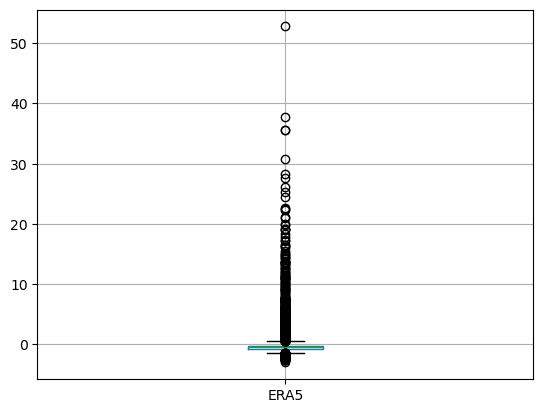

In [24]:
#Boxplot approximated groundwater recharge 1990-2020
box = pd.DataFrame({
    'ERA5': approx_9020,
})
box.boxplot()

<Axes: >

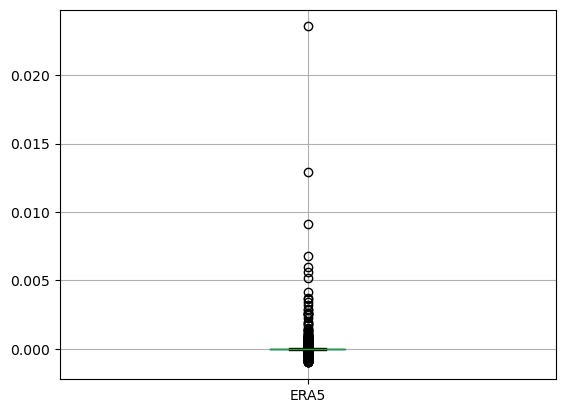

In [23]:
#Boxplot groundwater recharge 1990-2020
box = pd.DataFrame({
    'ERA5': recharge_9020,
})
box.boxplot()

In [25]:
box126 = pd.DataFrame(approx_9020)
box_126 = box126[approx_9020<=4]

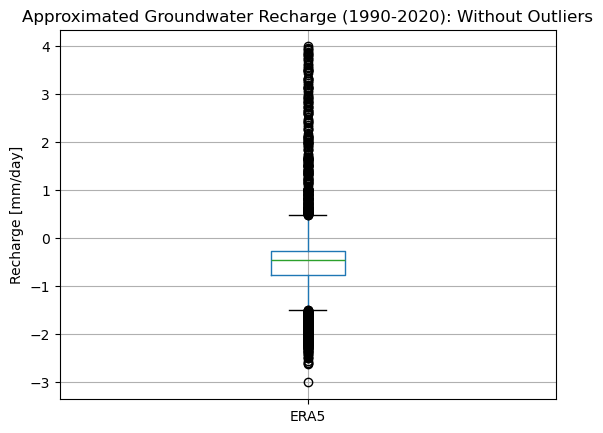

In [26]:
box = pd.DataFrame({
    'ERA5': box_126['Approximation Groundwater Recharge'],
    })
box.boxplot()
plt.title('Approximated Groundwater Recharge (1990-2020): Without Outliers')
plt.ylabel('Recharge [mm/day]');